In [2]:
import tensorflow as tf

Loading MNSIT dataset. this contains the handwritten dataset of digits in 28x28 sized images

In [3]:
mnist = tf.keras.datasets.mnist

DIviding the train and test data

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Plotting the value at index 1


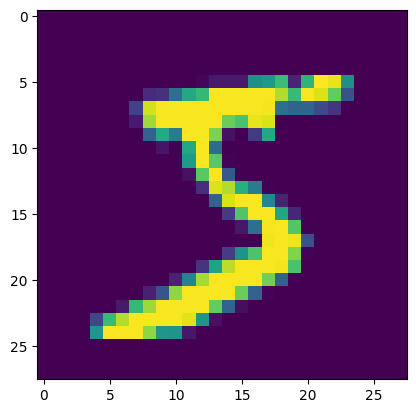

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

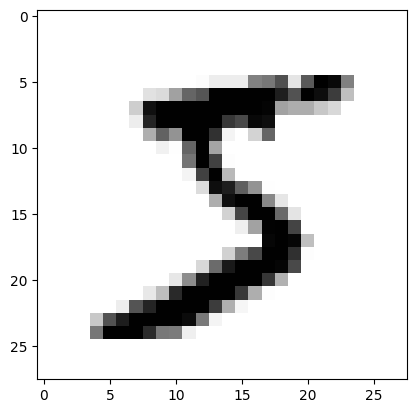

In [8]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

Normalizing the data or Pre-processing steps 

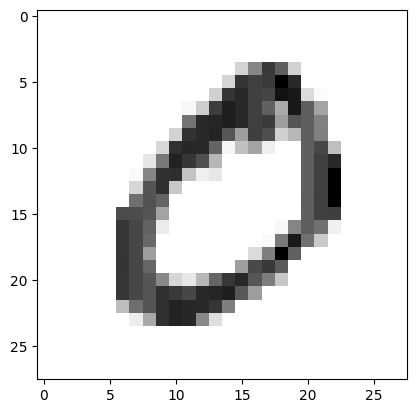

In [9]:
X_train=tf.keras.utils.normalize(X_train, axis= 1)
X_test=tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[1], cmap=plt.cm.binary)

In [10]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
print(Y_train[0])

5


Resizing the images to make it suitable to apply convolution opeerations

In [12]:
import numpy as np 
img_size = 28
X_trainr=np.array(X_train).reshape(-1, img_size, img_size, 1)
X_testr=np.array(X_test).reshape(-1, img_size, img_size, 1)

Training samples dimensions (60000, 28, 28, 1)
Testing samples dimensions (10000, 28, 28, 1)


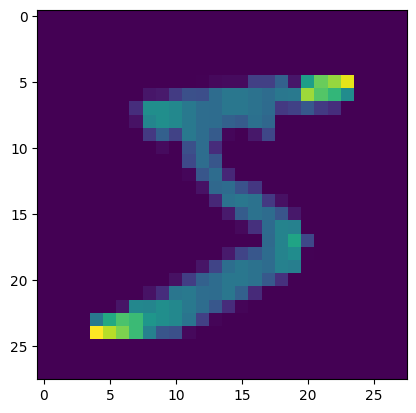

In [17]:
print("Training samples dimensions",X_trainr.shape)
print("Testing samples dimensions",X_testr.shape)
plt.imshow(X_trainr[0])
plt.show()

Creating deep neural network - training 60000 samples of MNIST handwritten dataset

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Input

# Define the input shape explicitly using Input() instead of inside Conv2D
model = Sequential([
    Input(shape=X_trainr.shape[1:]),  # Explicit input layer

    # First convolution layer
    Conv2D(64, (3,3)),
    Activation("relu"),
    MaxPool2D(pool_size=(2,2)),

    # Second convolution layer
    Conv2D(64, (3,3)),
    Activation("relu"),
    MaxPool2D(pool_size=(2,2)),

    # Third convolution layer
    Conv2D(64, (3,3)),
    Activation("relu"),
    MaxPool2D(pool_size=(2,2)),

    # Fully connected layers
    Flatten(),
    Dense(64),
    Activation("relu"),
    Dense(32),
    Activation("relu"),

    # Output layer (Number of classes = 10 for MNIST)
    Dense(10),
    Activation('softmax')
])

In [21]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
print(len(X_trainr))

60000


For better Accuracy

In [23]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [26]:
model.fit (X_trainr,Y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9879 - loss: 0.0388 - val_accuracy: 0.9827 - val_loss: 0.0582
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9894 - loss: 0.0331 - val_accuracy: 0.9853 - val_loss: 0.0509
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9813 - val_loss: 0.0685
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9934 - loss: 0.0221 - val_accuracy: 0.9841 - val_loss: 0.0579
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9931 - loss: 0.0185 - val_accuracy: 0.9833 - val_loss: 0.0609


In [28]:
test_loss, test_acc = model.evaluate(X_testr, Y_test)
print("Test loss on 10000 samples", test_loss)
print("Validation accuracy on 10000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9821 - loss: 0.0777
Test loss on 10000 samples 0.06469618529081345
Validation accuracy on 10000 test samples 0.9848999977111816


Making Predictions 

In [29]:
prediciton = model.predict(X_testr)
print(prediciton)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[2.3923400e-08 1.3426732e-05 4.2959291e-06 ... 9.9997878e-01
  8.7222674e-09 3.2235373e-06]
 [2.1005805e-07 1.7355225e-08 9.9999738e-01 ... 7.2613091e-08
  9.2318692e-07 1.2273125e-07]
 [3.2066173e-11 1.0000000e+00 2.3443809e-13 ... 6.9469708e-10
  7.0490336e-11 6.7460509e-10]
 ...
 [1.6619204e-13 3.2785894e-09 6.8725655e-12 ... 1.9669003e-10
  1.7546624e-08 8.6068553e-08]
 [1.2203897e-07 6.9597217e-10 9.1832444e-13 ... 2.3955032e-11
  1.6602760e-05 4.5973343e-07]
 [3.4807439e-07 4.6373852e-10 1.7482201e-08 ... 5.3919185e-11
  1.2919601e-06 1.2587628e-07]]


To understand, we need to convert the prediction from one hot encoding to actual values

In [30]:
print(np.argmax(prediciton[0]))

7


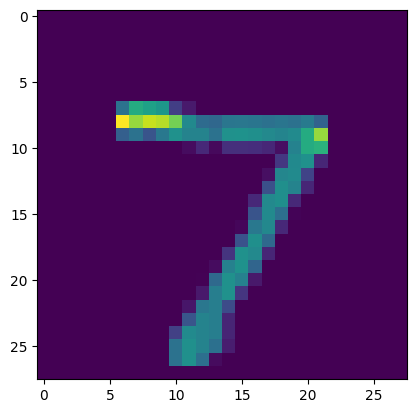

In [32]:
plt.imshow(X_test[0])

In [35]:
print(np.argmax(prediciton[9999]))

6


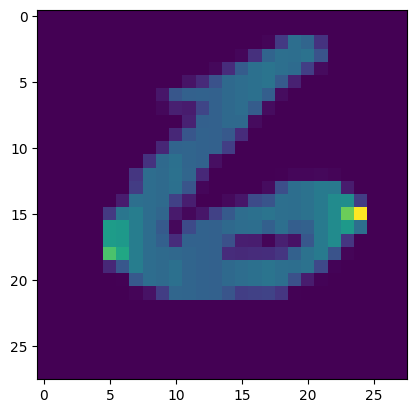

In [37]:
plt.imshow(X_test[9999])

Prediction is working completely good, so i will now use a custom handwritten digit and upload it using opencv

In [164]:
import cv2


In [438]:
img = cv2.imread('zero.png', cv2.IMREAD_GRAYSCALE)

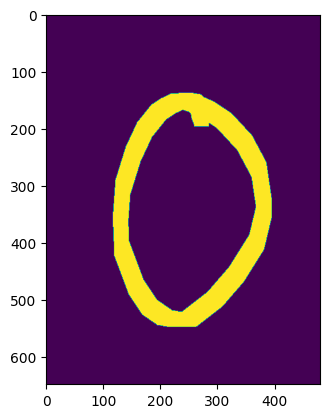

In [439]:
plt.imshow(img)

In [440]:
img.shape

(648, 481)

We need to convert in into gray image

In [441]:
gray = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2GRAY)

In [442]:
gray.shape

(648, 481)

In [443]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [444]:
resized.shape

(28, 28)

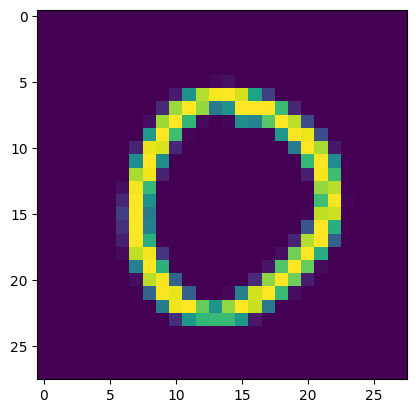

In [445]:
plt.imshow(resized)

Normalizing

In [446]:
newimg = tf.keras.utils.normalize(resized, axis=1)

Kernal operation for convolution layer

In [447]:
newimg=np.array(newimg). reshape(-1, img_size, img_size, 1)

In [448]:
newimg.shape

(1, 28, 28, 1)

In [449]:
prediciton = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [450]:
print(np.argmax(prediciton))

0
